<a href="https://colab.research.google.com/github/Sreenidhi2705/skin_diseases/blob/main/Skin_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split

# Step 1: Define correct ZIP path and extract
zip_path = '/content/skin diseasess.zip'  # <-- Make sure the file is uploaded here
extract_path = '/content/dataset_raw'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Auto-detect the dataset folder
def find_data_root(root_path):
    for root, dirs, files in os.walk(root_path):
        if dirs and all(os.path.isdir(os.path.join(root, d)) for d in dirs):
            return root
    return None

original_dataset_path = find_data_root(extract_path)
if not original_dataset_path:
    raise Exception("Could not locate dataset folder.")

print(f"Dataset root found at: {original_dataset_path}")

# Step 3: Create train and validation directories
base_dir = '/content/skin_diseases_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Step 4: Split and copy images
for class_name in os.listdir(original_dataset_path):
    class_path = os.path.join(original_dataset_path, class_name)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        print(f"Class '{class_name}': {len(images)} images found")
        if len(images) == 0:
            print(f"No images found in class folder '{class_name}', skipping...")
            continue

        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
        for img in val_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

print("Dataset successfully split into train/ and validation/ folders.")

Dataset root found at: /content/dataset_raw
Class 'IMG_CLASSES': 0 images found
No images found in class folder 'IMG_CLASSES', skipping...
Dataset successfully split into train/ and validation/ folders.


Extracted dataset to: /content/dataset_raw


Dataset successfully split into train/ and validation/ folders.
Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2000 - loss: 1.6132 - val_accuracy: 0.2000 - val_loss: 2.6379
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - accuracy: 0.2000 - loss: 2.5962 - val_accuracy: 0.2000 - val_loss: 2.2004
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step - accuracy: 0.3500 - loss: 2.1419 - val_accuracy: 0.2000 - val_loss: 1.9943
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - accuracy: 0.3000 - loss: 2.0100 - val_accuracy: 0.2000 - val_loss: 1.5431
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step - accuracy: 0.3500 - loss: 1.4836 - val_accuracy: 0.4000 - val_loss: 1.4440


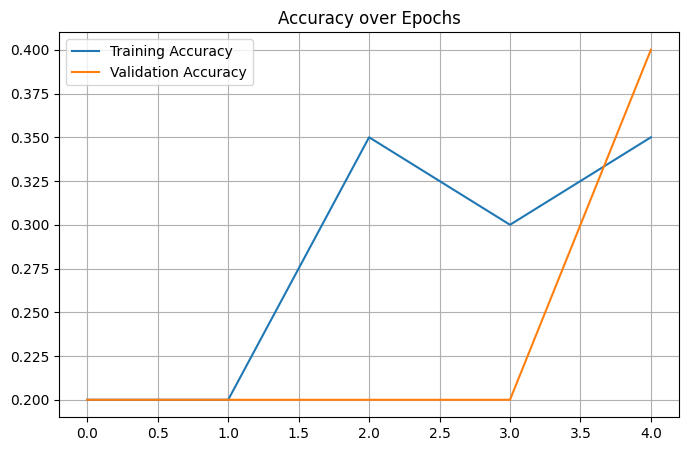

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


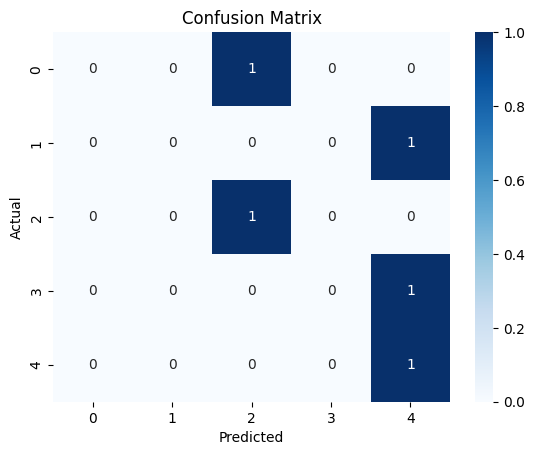

                                    precision    recall  f1-score   support

                    1. Eczema 1677       0.00      0.00      0.00         1
                2. Melanoma 15.75k       0.00      0.00      0.00         1
      3. Atopic Dermatitis - 1.25k       0.50      1.00      0.67         1
4. Basal Cell Carcinoma (BCC) 3323       0.00      0.00      0.00         1
   5. Melanocytic Nevi (NV) - 7970       0.33      1.00      0.50         1

                          accuracy                           0.40         5
                         macro avg       0.17      0.40      0.23         5
                      weighted avg       0.17      0.40      0.23         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Extract ZIP file
zip_path = '/content/skin diseasess.zip'
extract_path = '/content/dataset_raw'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted dataset to: {extract_path}\n")

# Step 2: Set dataset root path based on your inspection
original_dataset_path = '/content/dataset_raw/IMG_CLASSES'

if not os.path.exists(original_dataset_path):
    raise Exception(f"Dataset root path '{original_dataset_path}' does not exist.")

# Step 3: Prepare train/validation directories
base_dir = '/content/skin_diseases_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Step 4: Split dataset into train/validation folders
for class_name in os.listdir(original_dataset_path):
    class_path = os.path.join(original_dataset_path, class_name)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if len(images) == 0:
            print(f"No images found in class folder '{class_name}', skipping...")
            continue

        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
        for img in val_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

print("\nDataset successfully split into train/ and validation/ folders.")

# Step 5: Setup ImageDataGenerators
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Step 6: Build CNN model
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# Step 8: Plot accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()

# Step 9: Evaluate predictions on one batch
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(true_labels, predicted_labels, target_names=list(validation_generator.class_indices.keys())))